In [1]:
%matplotlib.pyplot inline
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
from classifiers.datasets.dataloader import Sklearn_DataLoader
from classifiers.datasets.datascaler import DataScaler
# for quantum kernel classifier
from sklearn.svm import SVC
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel

# for QASVM
from classifiers.quantum import Qasvm_Mapping_4x2
from classifiers.quantum.nqsvm import NormQSVM
from qiskit.utils import QuantumInstance
from qiskit.ignis.mitigation import CompleteMeasFitter
from qiskit.circuit.library import RealAmplitudes, EfficientSU2, NLocal, TwoLocal
from qiskit.providers.aer import AerSimulator
from qiskit import IBMQ
from classifiers.callback import CostParamStorage
from classifiers.callback import SummaryWriter
from classifiers.quantum.quantum_circuits import AnsatzCircuit9
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import ParameterVector

/home/quic/anaconda3/envs/qiskit29/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [4]:
np.random.seed(0)
dl = Sklearn_DataLoader('iris', (0, 1, 2))
X, y, Xt, yt = dl(2**7, 0, True)
plt.scatter(X[:,0], X[:,1], c=y)
X = X[:, 0:2]
Xt = Xt[:, 0:2]
np.random.seed(None)

In [5]:
ds = DataScaler('minmax', feature_range=(-np.pi/2, np.pi/2))
X = -ds(X)
Xt = -ds(Xt)
plt.scatter(X[:,0], X[:,1], c=y)


In [6]:
pv = ParameterVector('data', 2)
feature_map = QuantumCircuit(2)
feature_map.ry(pv[0], 0)
feature_map.rz(pv[1], 0)
quantum_instance = QuantumInstance(AerSimulator(), shots=2**10)


In [7]:
from qiskit.algorithms.optimizers import SPSA
storage = CostParamStorage()
nqsvm = NormQSVM(data=X, label=y, quantum_instance=quantum_instance, lamda=1.0, feature_map=feature_map, var_form=None)
spsa = SPSA(maxiter=2**10, blocking=True, last_avg=16, callback=storage)
result = spsa.optimize(nqsvm.num_parameters, nqsvm.cost_fn, initial_point=nqsvm.initial_point)

In [8]:
storage.plot()

In [9]:
storage.plot_params()

In [10]:
nqsvm.parameters.update(result[0])
nqsvm.accuracy(Xt, yt)

1.0

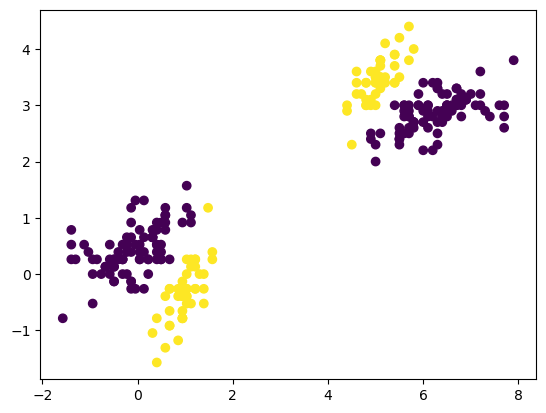

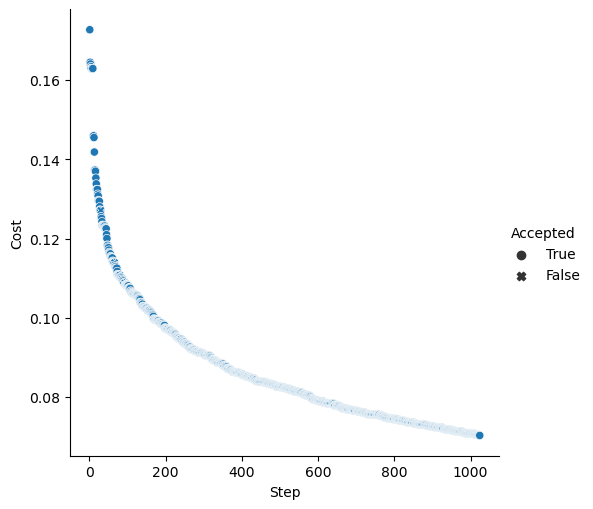

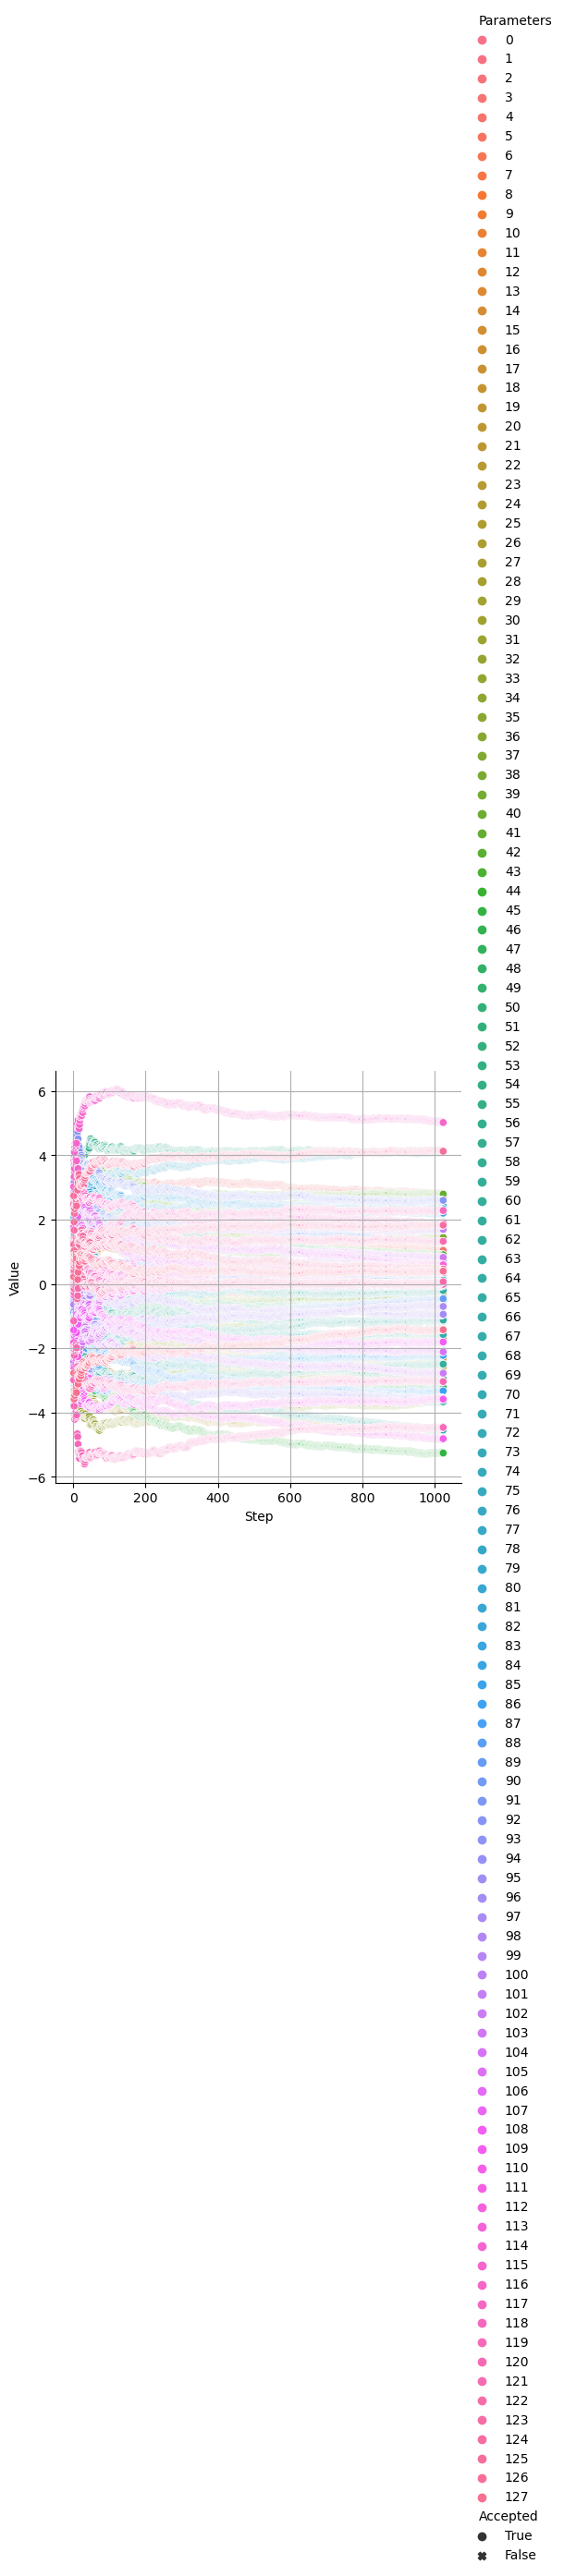

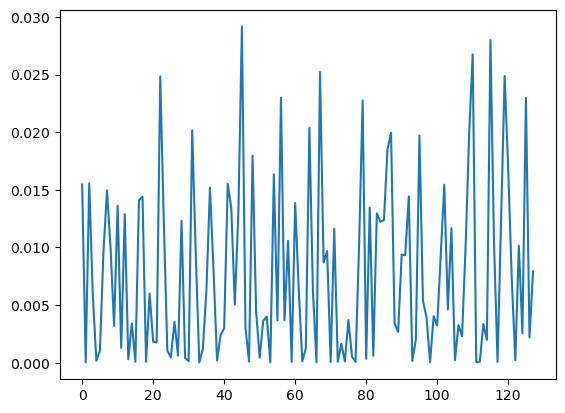

In [11]:
plt.figure()
plt.plot(nqsvm.alpha(nqsvm.parameters))
plt.show()

In [12]:
var_form = AnsatzCircuit9(7, reps=7)
storage = CostParamStorage()
nqsvm = NormQSVM(data=X, label=y, quantum_instance=quantum_instance, lamda=1.0, feature_map=feature_map, var_form=var_form)
spsa = SPSA(maxiter=2**10, blocking=True, last_avg=16, callback=storage)
result = spsa.optimize(nqsvm.num_parameters, nqsvm.cost_fn, initial_point=nqsvm.initial_point)

In [13]:
storage.plot()

In [14]:
storage.plot_params()

In [15]:
nqsvm.parameters.update(result[0])
nqsvm.accuracy(Xt, yt)

1.0

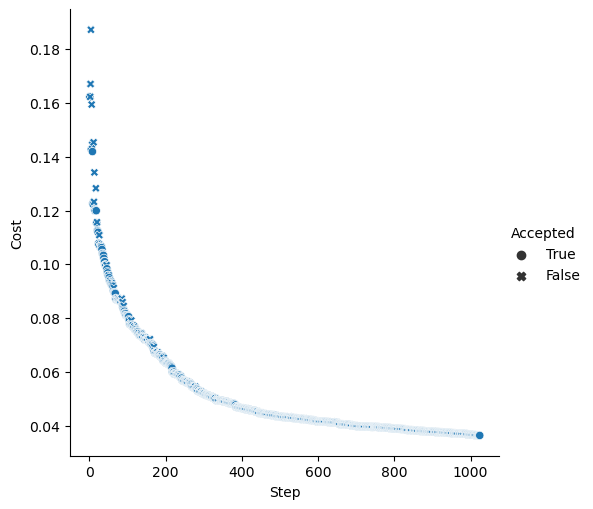

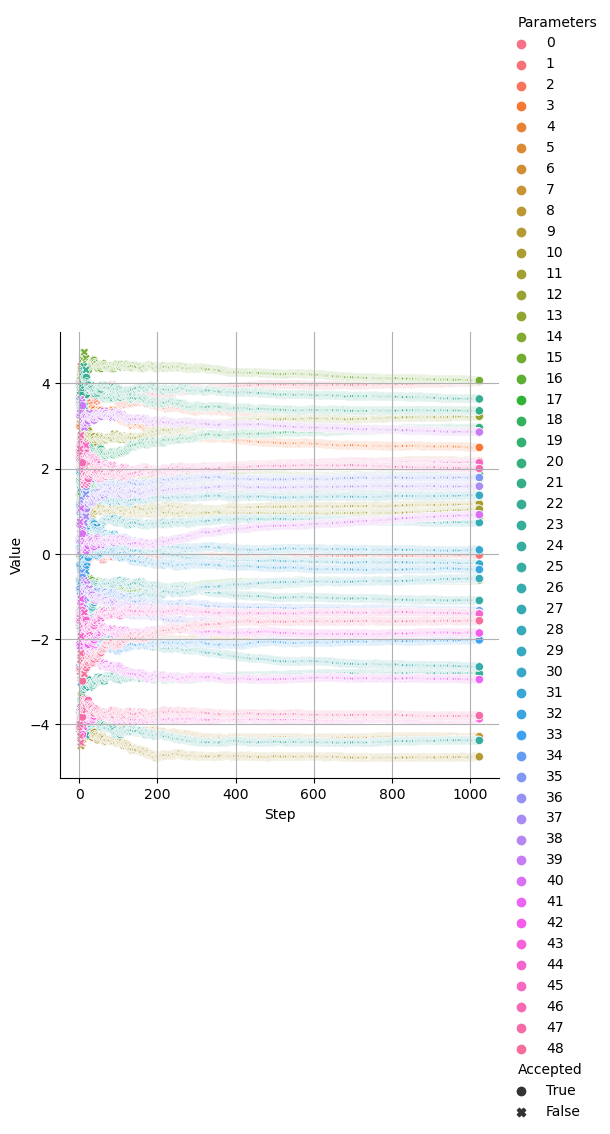

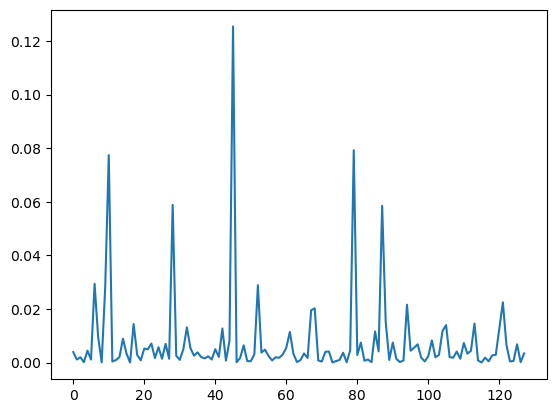

In [16]:
plt.figure()
plt.plot(nqsvm.alpha(nqsvm.parameters))
plt.show()

In [17]:
import qiskit.tools.jupyter
%qiskit_version_table
